In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import math

import matplotlib.pyplot as plt
import numpy as np

In [15]:
!if ! ls /tmp/train.h5; \
    wget https://repo.gorchilov.net/datasets/genetics.tar.gz -O /tmp/genetics.tar.gz; \
    tar -xf /tmp/genetics.tar.gz -C /tmp; \
    end

import h5py

train = h5py.File('/tmp/train.h5', mode='r')
train_X = train['data'][:]
train_y = train['labels'][:]

test = h5py.File('/tmp/test.h5', mode='r')
test_X = test['data'][:]
test_y = test['labels'][:]

/tmp/FOX_train.h5


In [16]:
def schedule(epoch, lr) -> float:
    if epoch < 200 or epoch % 50 != 0:
        return lr
    else:
        return lr * math.exp(-0.01)

In [51]:
clear_session()

model = Sequential([
                    LSTM(16, input_shape=(4, 1000)),
                    Dense(64, activation='relu'),
#                     Dropout(0.2),
#                     Dense(32, activation='relu'),
#                     Dropout(0.2),
                    Dense(1, activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                65088     
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 66,241
Trainable params: 66,241
Non-trainable params: 0
_________________________________________________________________


In [52]:
# optimizer = RMSprop(ExponentialDecay(0.01, decay_steps=100000, decay_rate=0.1))
optimizer = RMSprop()

model.compile(optimizer=optimizer, loss='mae')

In [ ]:
callbacks = LearningRateScheduler(schedule)
history = model.fit(train_X[:], 
                    train_y[:], 
                    epochs=500, 
                    callbacks=[callbacks]
)

Epoch 1/500
3125/3125 [==============================] - 5s 2ms/step - loss: 1900.5706 - lr: 0.0010
Epoch 2/500
3125/3125 [==============================] - 5s 2ms/step - loss: 1897.4907 - lr: 0.0010
Epoch 3/500
3125/3125 [==============================] - 5s 2ms/step - loss: 1895.9062 - lr: 0.0010
Epoch 4/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1894.7605 - lr: 0.0010
Epoch 5/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1893.0664 - lr: 0.0010
Epoch 6/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1889.9377 - lr: 0.0010
Epoch 7/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1884.3451 - lr: 0.0010
Epoch 8/500
3125/3125 [==============================] - 4s 1ms/step - loss: 1876.1864 - lr: 0.0010
Epoch 9/500
3125/3125 [==============================] - 5s 2ms/step - loss: 1865.2631 - lr: 0.0010
Epoch 10/500
3125/3125 [==============================] - 5s 2ms/step - loss: 1851.1699 - lr: 0.0010

3125/3125 [==============================] - 4s 1ms/step - loss: 791.4944 - lr: 0.0010
Epoch 164/500
3125/3125 [==============================] - 4s 1ms/step - loss: 789.5180 - lr: 0.0010
Epoch 165/500
3125/3125 [==============================] - 5s 1ms/step - loss: 788.0994 - lr: 0.0010
Epoch 166/500
3125/3125 [==============================] - 4s 1ms/step - loss: 787.1378 - lr: 0.0010
Epoch 167/500
3125/3125 [==============================] - 5s 1ms/step - loss: 787.4379 - lr: 0.0010
Epoch 168/500
3125/3125 [==============================] - 4s 1ms/step - loss: 783.0015 - lr: 0.0010
Epoch 169/500
3125/3125 [==============================] - 4s 1ms/step - loss: 785.4245 - lr: 0.0010
Epoch 170/500
3125/3125 [==============================] - 4s 1ms/step - loss: 785.1008 - lr: 0.0010
Epoch 171/500
3125/3125 [==============================] - 5s 1ms/step - loss: 782.6015 - lr: 0.0010
Epoch 172/500
3125/3125 [==============================] - 4s 1ms/step - loss: 782.3801 - lr: 0.0010
Epoc

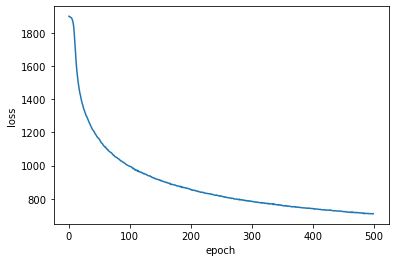

In [48]:
start = 0
end = 500

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(start, end), history.history['loss'][start:end])
plt.show()

In [49]:
model.evaluate(test_X[:], test_y[:])

313/313 [==============================] - 0s 890us/step - loss: 2426.7693


2426.769287109375

In [50]:
model.save('model')

!tar -zcvf model.tar.gz model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets
model/
model/assets/
model/variables/
model/variables/variables.index
model/variables/variables.data-00001-of-00002
model/variables/variables.data-00000-of-00002
model/saved_model.pb
